In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import jsonargparse
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# configure matplotlib
%matplotlib notebook
# %matplotlib inline

In [4]:
#mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('font',**{'family':'serif'})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [5]:
from cdi.util.analysis.show_frey_faces import show_examples
from cdi.data.frey_faces import FreyFacesDataset

## Analysis setup

### Global settings

In [6]:
data_name = 'fcvae_frey_processed'
exp_seed_keys = [
    'm20190508_d20200325_20200406_20200407',
#     'm2019050811_d2020032511_20200406_20200407',
#     'm2019050822_d2020032522_20200406_20200407',
#     'm2019050833_d2020032533_20200406_20200407',
#     'm2019050844_d2020032544_20200406_20200407',
#     'm2019050855_d2020032555_20200406_20200407',
#     'm2019050866_d2020032566_20200406_20200407',
#     'm2019050877_d2020032577_20200406_20200407',
#     'm2019050888_d2020032588_20200406_20200407',
#     'm2019050899_d2020032599_20200406_20200407',
]

### Templates

In [7]:
log_path_base = f'../../trained_models/{data_name}/learning_experiments'

## Helpers

## Imputations

In [8]:
original_dataset = FreyFacesDataset('../../data', preprocess=False, test=True, generated='FC-VAE')

Using test set. fcvae_frey_generated_test.mat


In [9]:
gibbs_path = f'{log_path_base}/{{}}/{{}}/{{}}/evaluations/tensors/gibbs_samples_test.npz'
obs_mean_path = f'{log_path_base}/{{}}/{{}}/{{}}/evaluations/tensors/obs_mean_0.npz'

### 16%

In [10]:
model = 'fcvae_pretrained_svar_cdi'
exp_seed_key = exp_seed_keys[0]
group = 1

data = np.load(gibbs_path.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)
# X_postprocessed = data['X']

In [11]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[]
(0,)


<IPython.core.display.Javascript object>


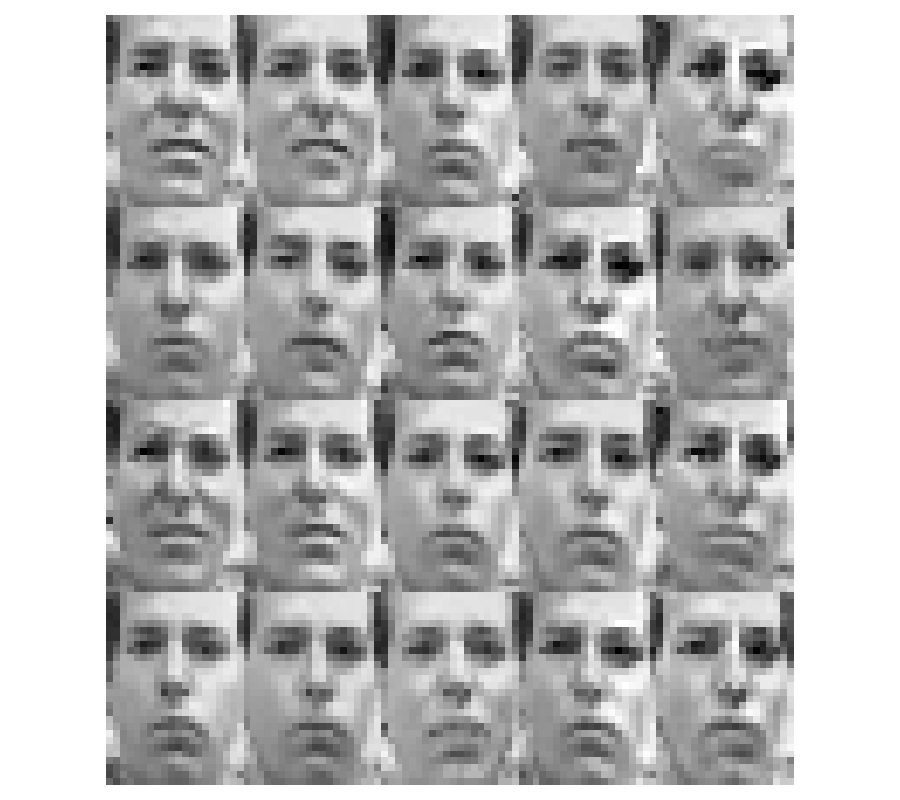

In [12]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


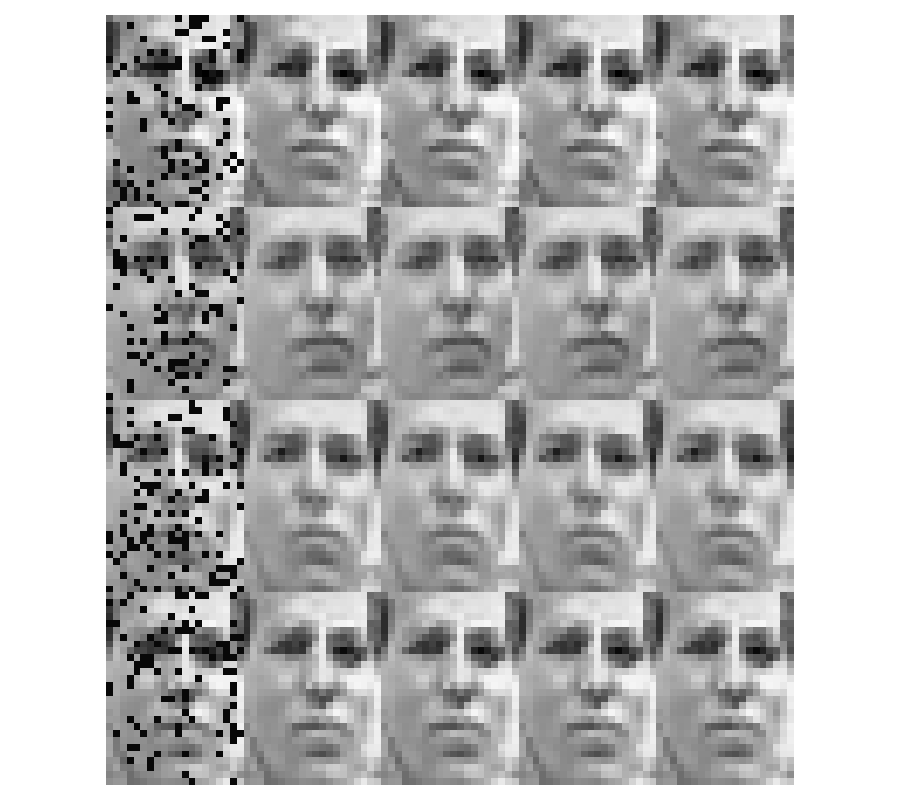

In [15]:
idx = np.sort(np.random.choice(np.unique(data['orig_I']), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

### 50%

In [17]:
model = 'fcvae_pretrained_svar_cdi'
exp_seed_key = exp_seed_keys[0]
group = 3

data = np.load(gibbs_path.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [18]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[ 7213 11361 11363 11366 11367]
(5,)


<IPython.core.display.Javascript object>


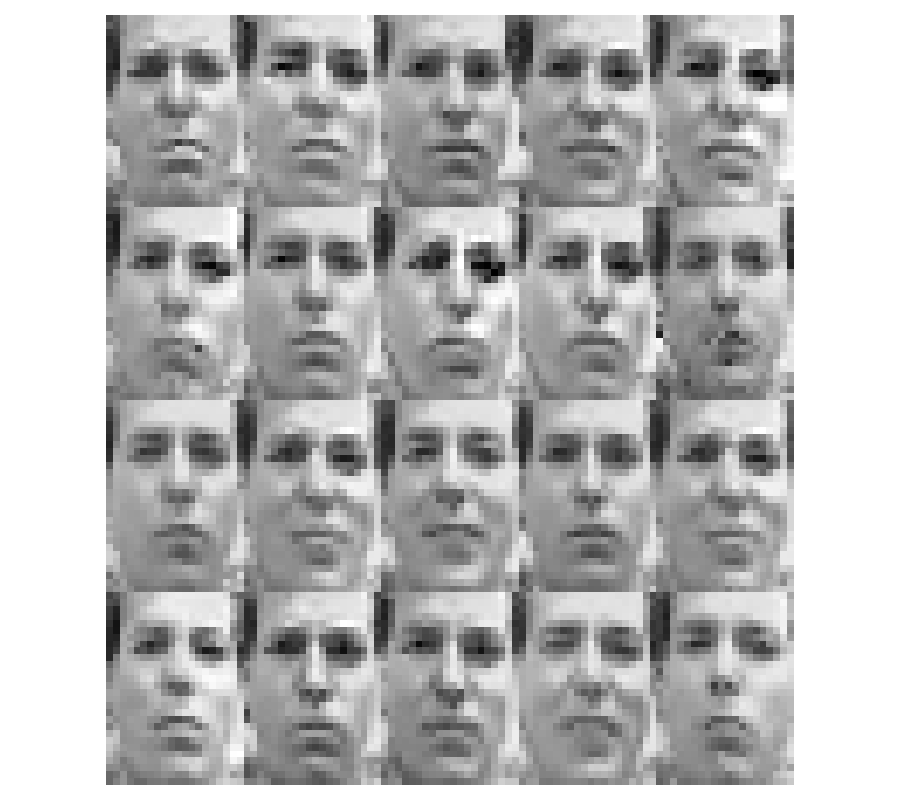

In [12]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


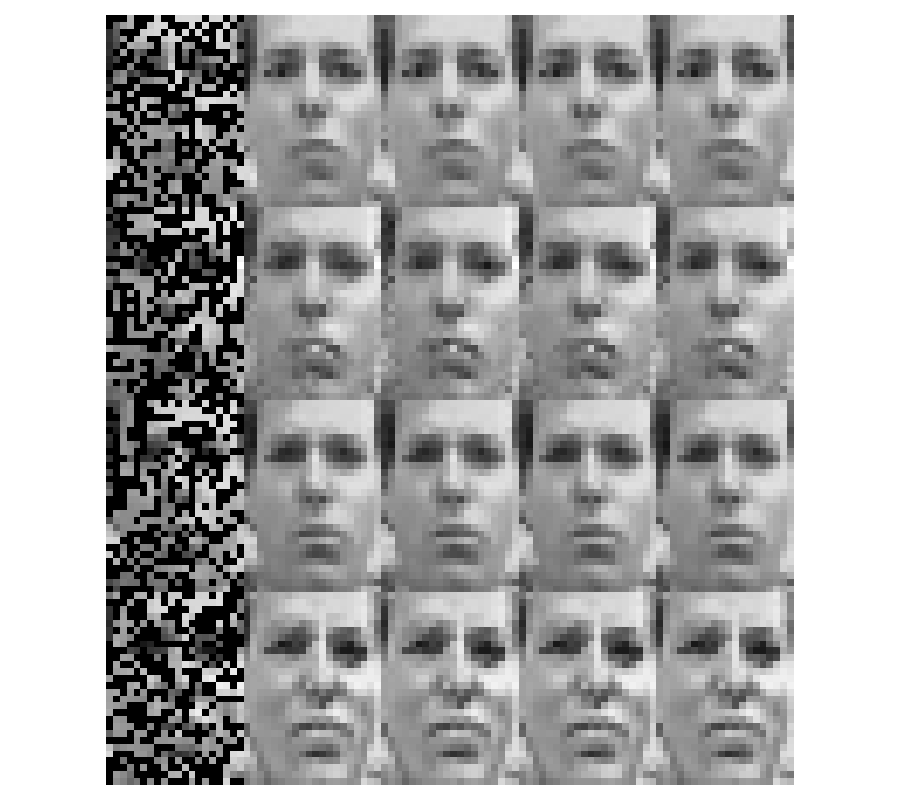

In [13]:
idx = np.sort(np.random.choice(np.unique(data['orig_I']), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

### 83%

#### K = 1

In [11]:
model = 'fcvae_pretrained_svar_cdi'
exp_seed_key = exp_seed_keys[0]
group = 5

data = np.load(gibbs_path.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [21]:
X_postprocessed.shape

(30000, 560)

In [22]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[  620   621   622   623   624   625   626   627   628   629   911  1092
  3052  3198  3261  3371  3373  3374  3375  3500  3502  3503  3504  3505
  3506  3508  3509  3972  4102  4105  4108  4525  4528  4730  4731  4732
  4733  4734  4735  4736  4757  4759  5440  5441  5442  5444  5445  5446
  5447  5448  5449  5586  6296  6462  7433  7437  7683  7765  7766  7767
  7899  8070  8071  8072  8073  8074  8075  8077  8078  8079  8190  8191
  8194  8196  8198  8442  8444  8448  8449  8472  8474  8522  8960  8961
  8962  8968  8969  9261  9262  9269  9461  9583  9770  9771  9772  9773
  9774  9775  9776  9777  9778 10181 10185 11010 11031 11036 11110 11116
 11117 11118 11150 11151 11280 11281 11282 11285 11286 11288 11289 11681
 11682 11684 11687 12181 12184 12792 12793 13030 13032 13037 13113 13465
 13982 14129 14479 15250 15254 15752 15756 15758 15759 15811 15849 15870
 15871 15872 15874 15877 15878 15879 15891 15894 15895 15896 15897 16081
 16085 16086 16230 16233 16235 16238 16710 16711 16

<IPython.core.display.Javascript object>


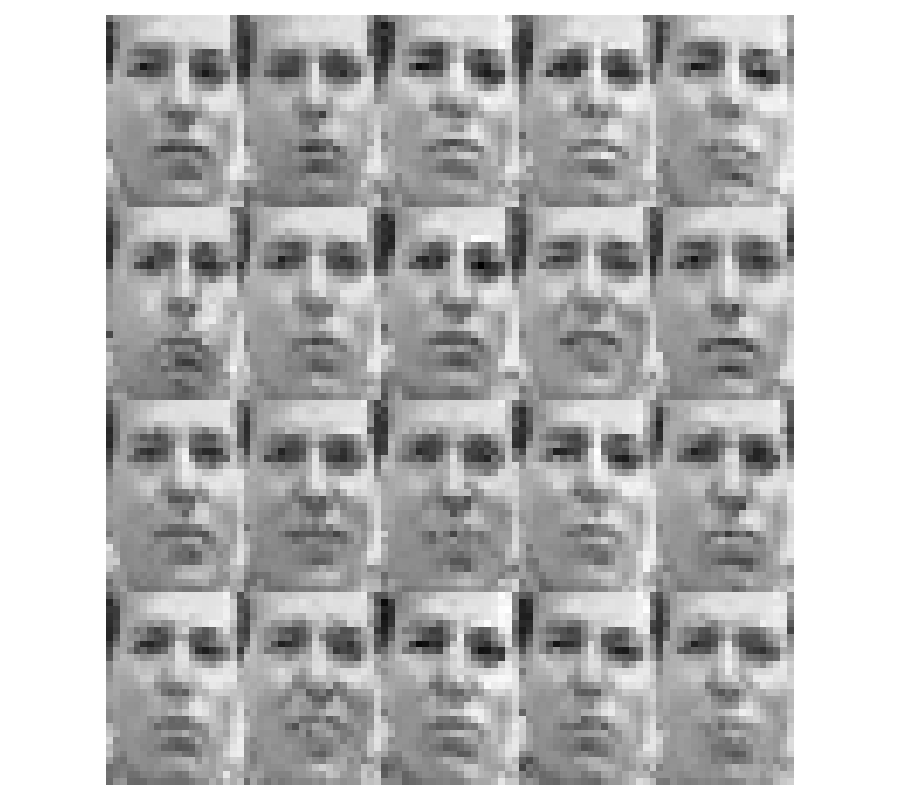

In [23]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


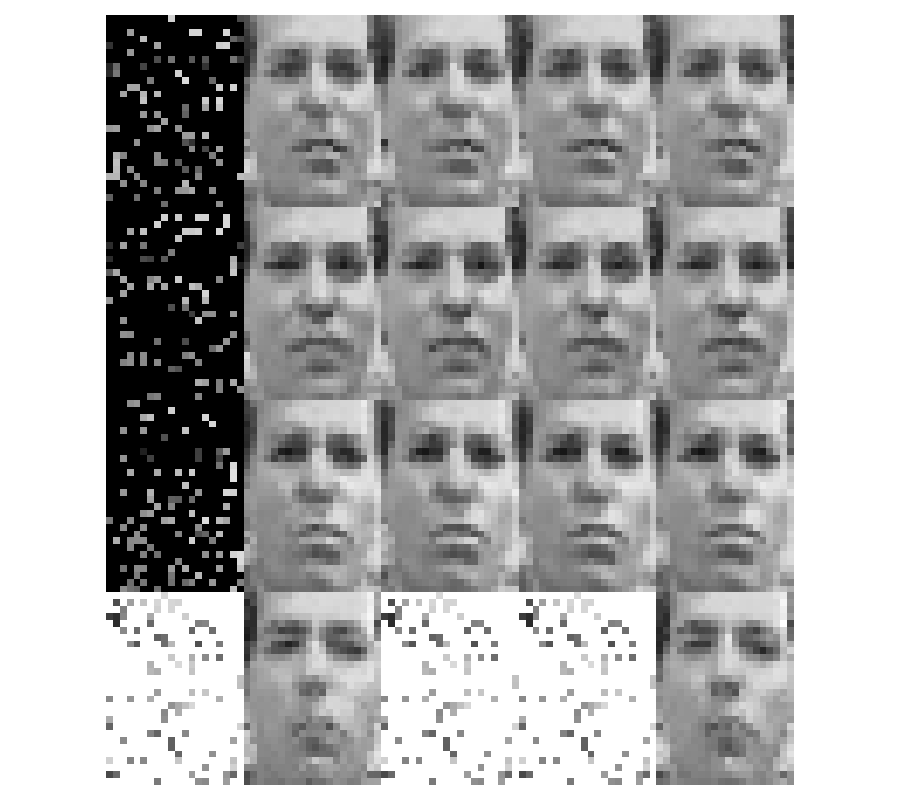

In [53]:
idx = np.sort(np.random.choice(np.unique(data['orig_I']), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

#### K = 5

In [14]:
model = 'fcvae_pretrained_svar_cdi_k5'
exp_seed_key = exp_seed_keys[0]
group = 5

data = np.load(gibbs_path.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [15]:
X_postprocessed.shape

(30000, 560)

In [16]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[ 6340  6342  6344  6345  6347  6348  8080  9942 16903]
(9,)


<IPython.core.display.Javascript object>


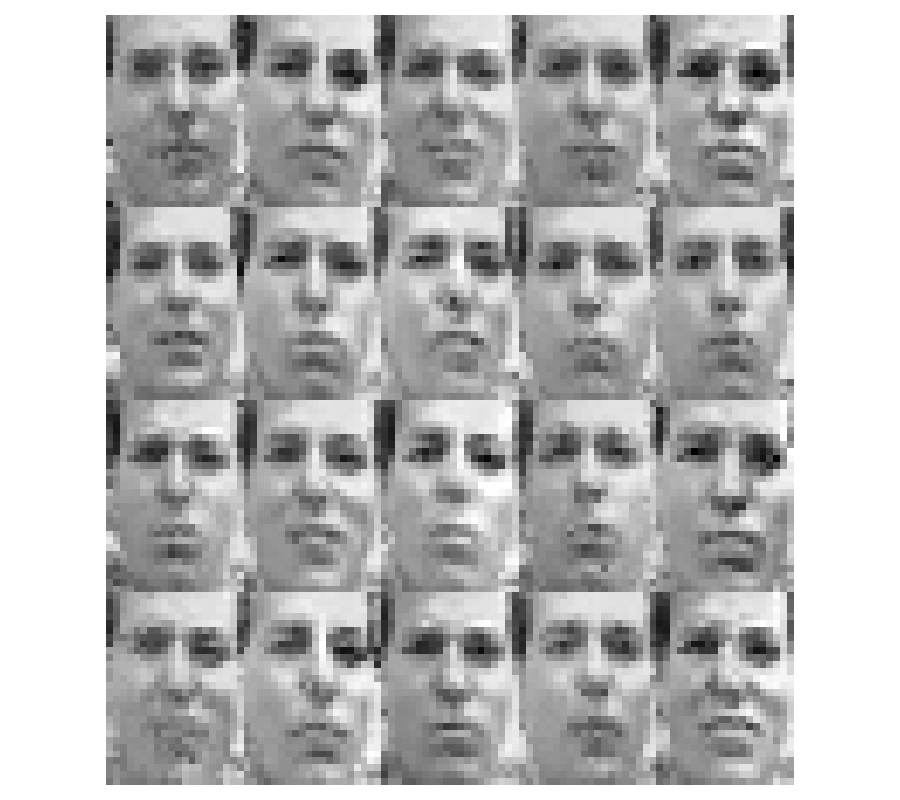

In [15]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


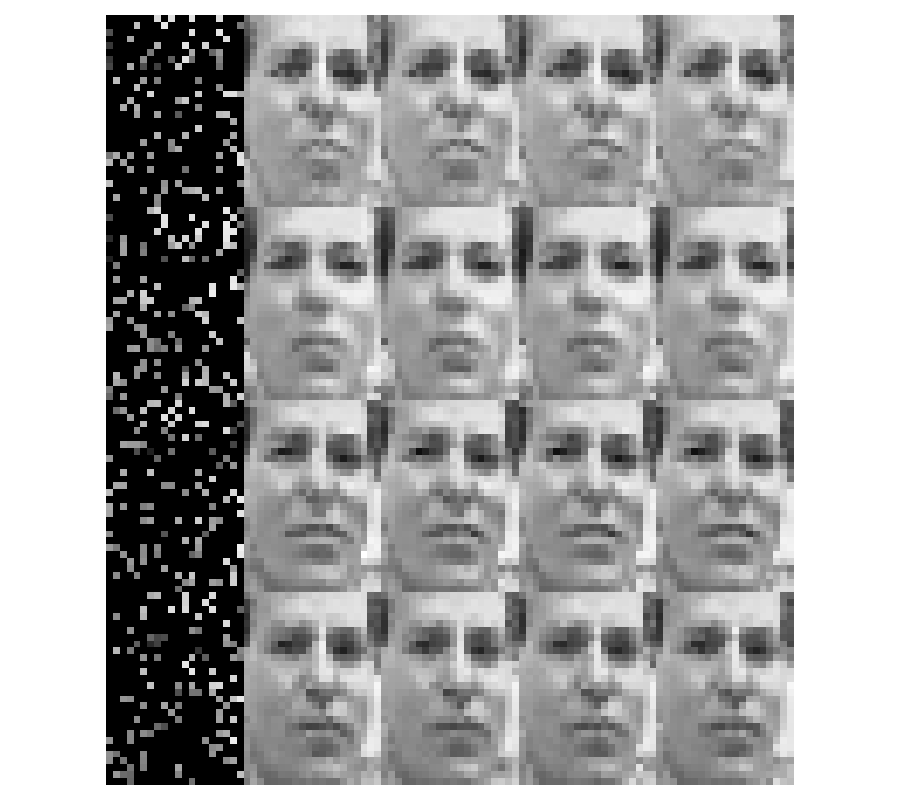

In [16]:
idx = np.sort(np.random.choice(np.unique(data['orig_I']), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

## Block-missingness imputations (top)

In [21]:
gibbs_path_block = f'{log_path_base}/{{}}/{{}}/{{}}/evaluations/tensors/gibbs_samples_1_test.npz'

### 83%

In [22]:
model = 'fcvae_pretrained_svar_cdi_k5'
exp_seed_key = exp_seed_keys[0]
group = 5

data = np.load(gibbs_path_block.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [23]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[15111]
(1,)


<IPython.core.display.Javascript object>


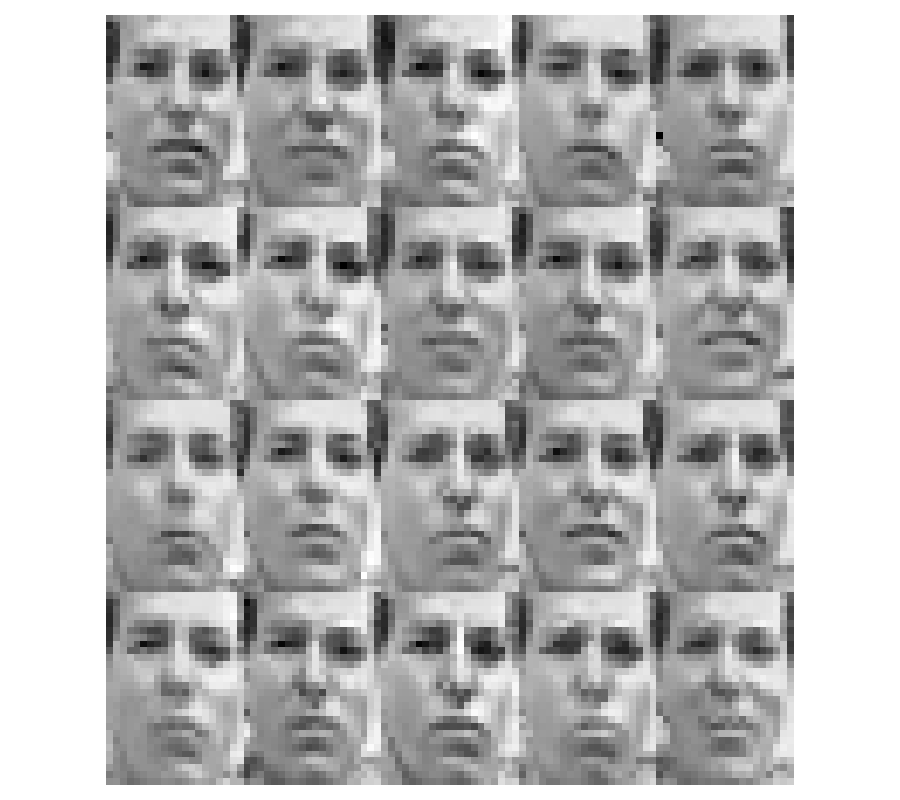

In [24]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


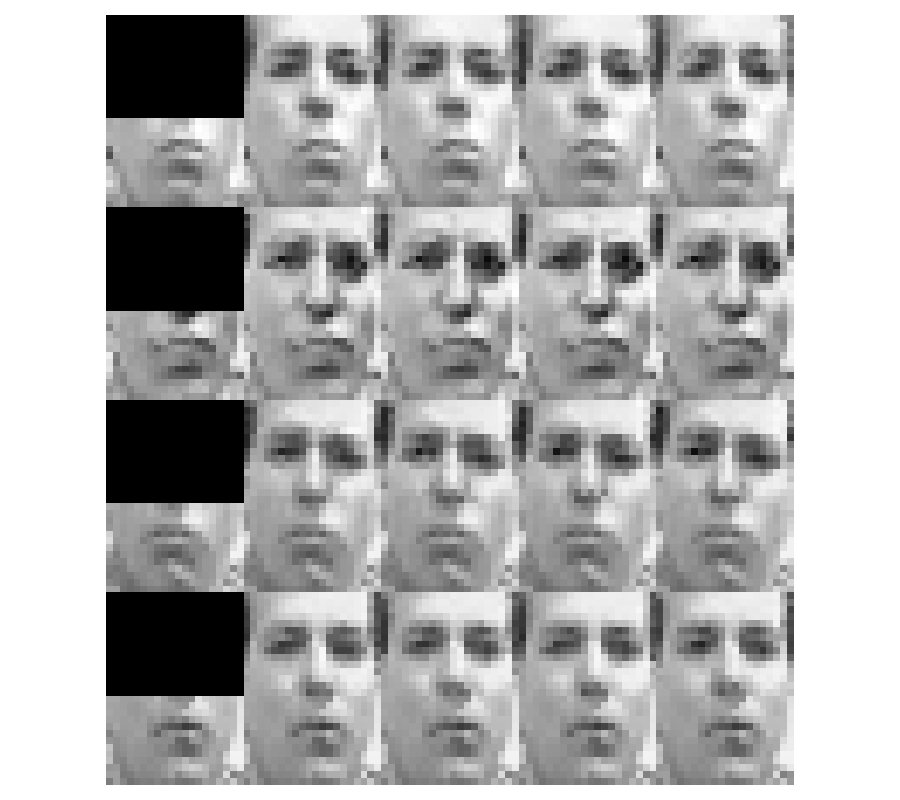

In [32]:
incomp = data['M'].sum(axis=-1) != data['M'].shape[-1]
idx = np.sort(np.random.choice(np.unique(data['orig_I'][incomp]), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

## Block-missingness imputations (bottom)

In [33]:
gibbs_path_block2 = f'{log_path_base}/{{}}/{{}}/{{}}/evaluations/tensors/gibbs_samples_2_test.npz'

### 83\%

In [37]:
model = 'fcvae_pretrained_svar_cdi_k5'
exp_seed_key = exp_seed_keys[0]
group = 5

data = np.load(gibbs_path_block2.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [38]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[ 2435  2436  2437  2438  2440  2441  2442  2444  4706  4711  4713  4984
  7591  7592  7594  7595  7596  7597  7621  7624  7626  7628  8136  8138
  8140  8142  8143  8144 12721 12722 12723 12724 12725 12726 12728 12729
 12730 13373 13575 13576 13577 13578 13580 13581 13582 13583 13584 14589
 14593 14595 15060 15064 15065 15067 15068 15781 15782 15783 15784 15785
 15786 15787 15788 15789 16045 16046 16047 16048 16049 16050 16051 16052
 16053 19510 19511 19919 19921 19922 19923 19924 19925 19926 19927 20788
 20790 20791 20793 20796 24654 24655 24656 24657 24658 24659 24660 24661
 24662 24663 25642 25649 26148 26150 26838 26842 27848 27849 27850 27851
 27852 27853 27854 27855 27856 27857]
(114,)


<IPython.core.display.Javascript object>


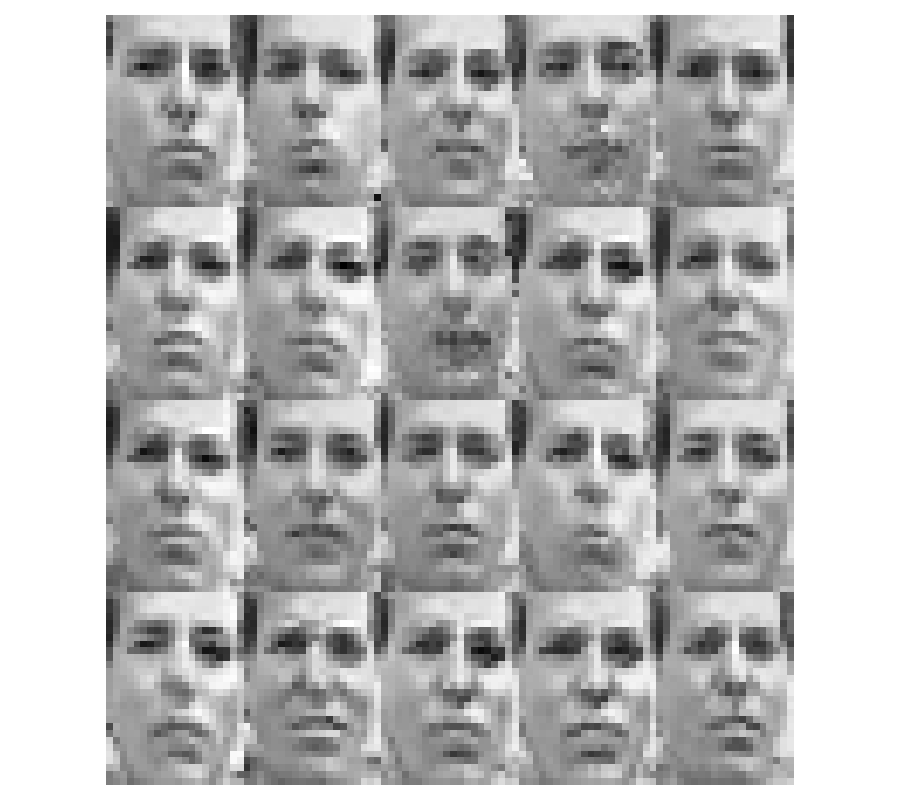

In [39]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


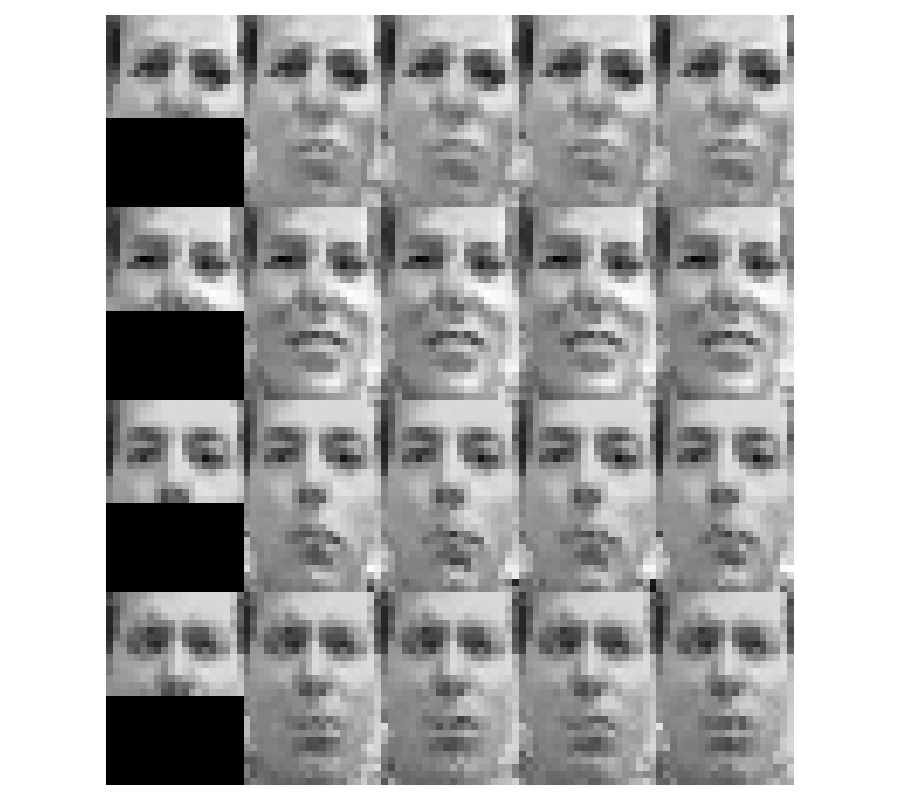

In [40]:
incomp = data['M'].sum(axis=-1) != data['M'].shape[-1]
idx = np.sort(np.random.choice(np.unique(data['orig_I'][incomp]), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

## Block-missingness imputations (top-left inverse)

In [41]:
gibbs_path_block3 = f'{log_path_base}/{{}}/{{}}/{{}}/evaluations/tensors/gibbs_samples_3_test.npz'

### 83\%

In [42]:
model = 'fcvae_pretrained_svar_cdi_k5'
exp_seed_key = exp_seed_keys[0]
group = 5

data = np.load(gibbs_path_block3.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [43]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[ 9901 11010 11015 16851]
(4,)


<IPython.core.display.Javascript object>


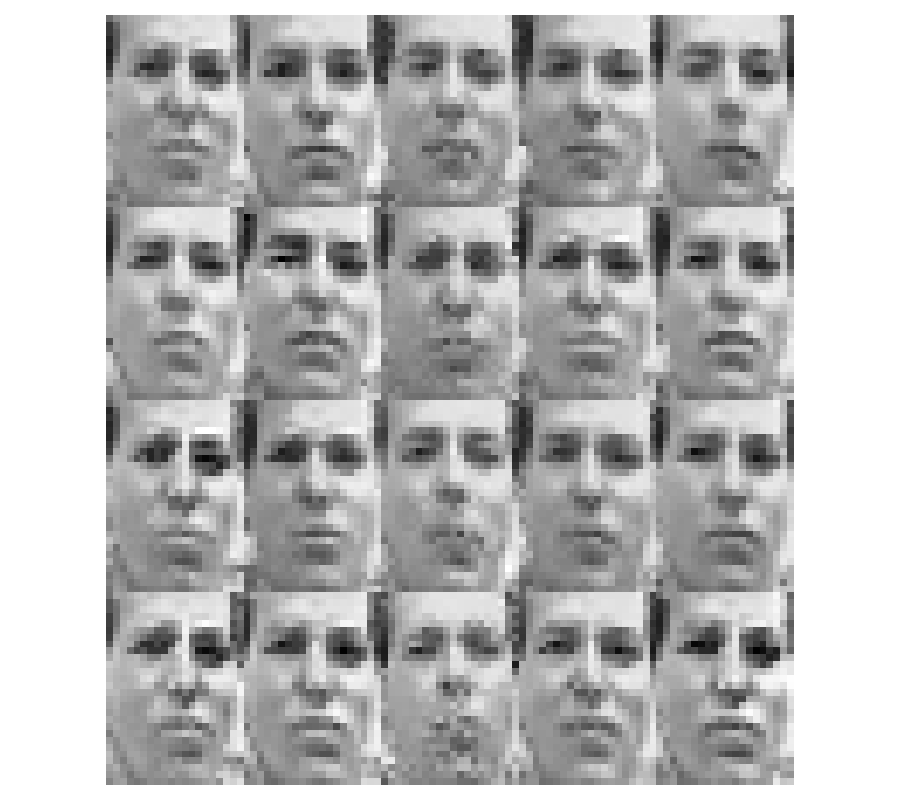

In [44]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


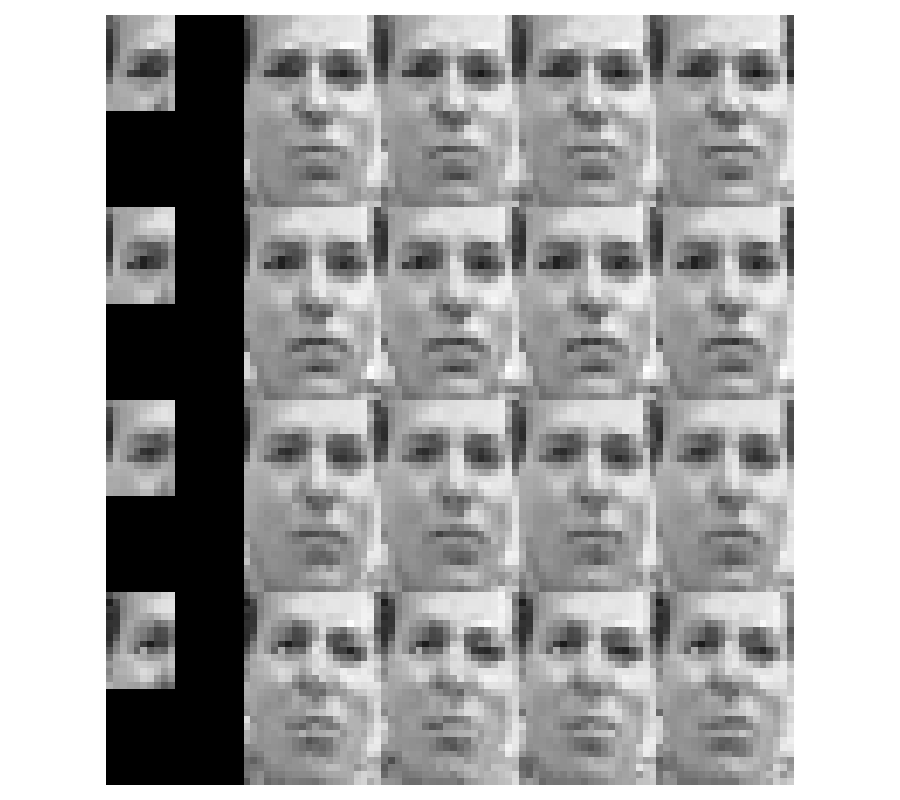

In [45]:
incomp = data['M'].sum(axis=-1) != data['M'].shape[-1]
idx = np.sort(np.random.choice(np.unique(data['orig_I'][incomp]), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

## Block-missingness imputations (all missing)

In [46]:
gibbs_path_block4 = f'{log_path_base}/{{}}/{{}}/{{}}/evaluations/tensors/gibbs_samples_4_test.npz'

### 16\%

In [51]:
model = 'fcvae_pretrained_svar_cdi_k5'
exp_seed_key = exp_seed_keys[0]
group = 1

data = np.load(gibbs_path_block4.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [52]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[ 1067  1190  1395  1555  1614  1865  1943  2245  3628  3632  3641  3961
  4278  4369  4917  4941  4983  4993  5166  5216  5246  5329  5701  6370
  6852  7565  7715  8161  8255  8722  9189  9387  9885  9961 10060 10067
 11569 11833 12292 12894 12928 12957 13026 13205 13863 13936 14441 14586
 14942 15214 15224 16185 16794 17098 17187 17327 17334 17446 17703 18056
 18457 18525 18777 18825 19004 19645 19754 19755 20118 20486 21072 21116
 21656 22660 22950 23376 23862 24378 24611 24756 24962 25366 25701 26098
 26307 26312 26498 27025 28385]
(89,)


<IPython.core.display.Javascript object>


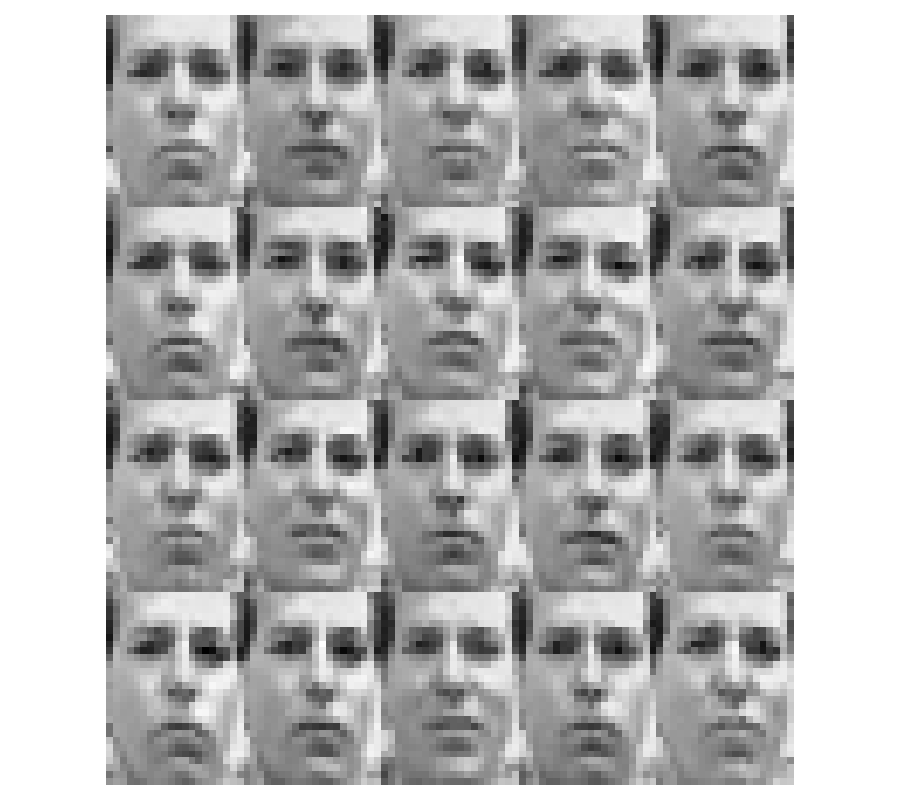

In [53]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


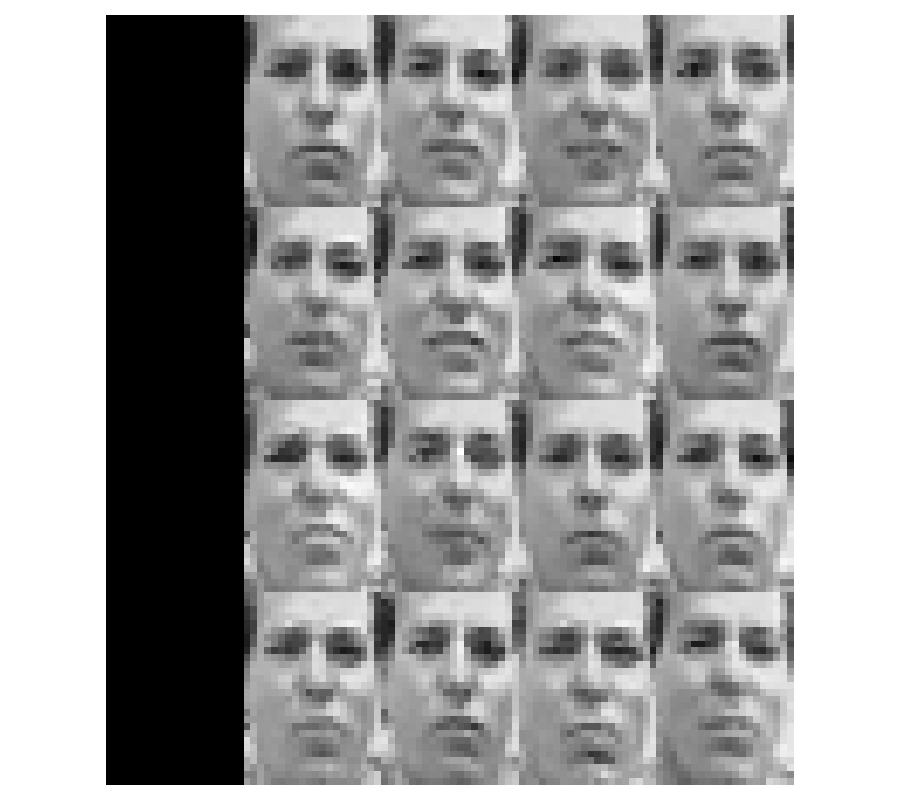

In [54]:
incomp = data['M'].sum(axis=-1) != data['M'].shape[-1]
idx = np.sort(np.random.choice(np.unique(data['orig_I'][incomp]), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

### 83\%

In [47]:
model = 'fcvae_pretrained_svar_cdi_k5'
exp_seed_key = exp_seed_keys[0]
group = 5

data = np.load(gibbs_path_block4.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [48]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[]
(0,)


<IPython.core.display.Javascript object>


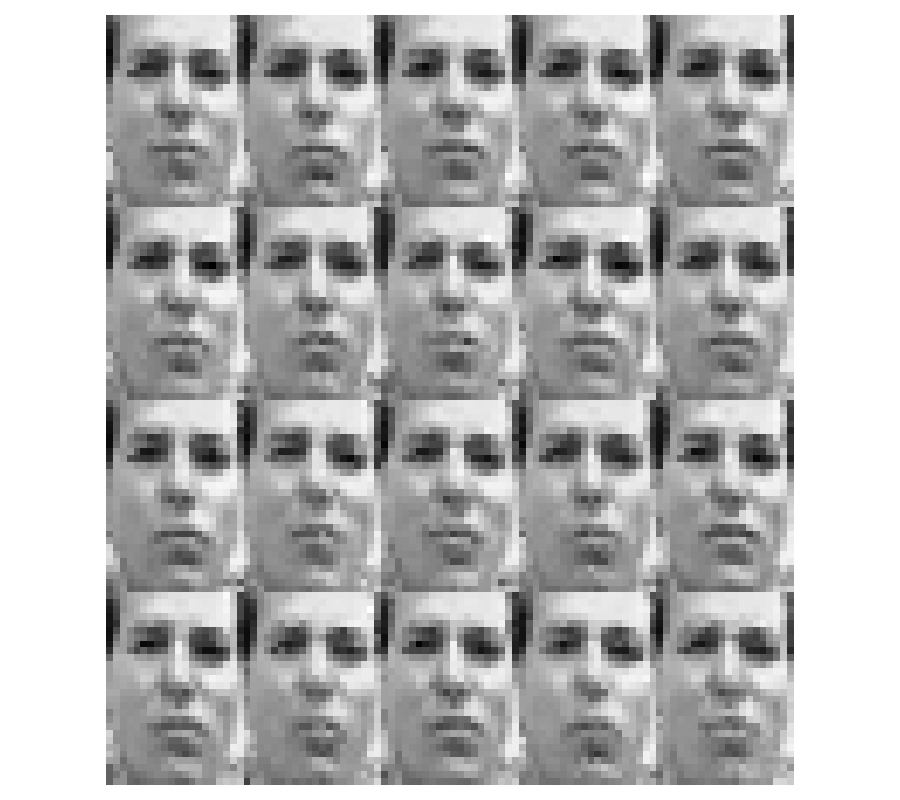

In [49]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


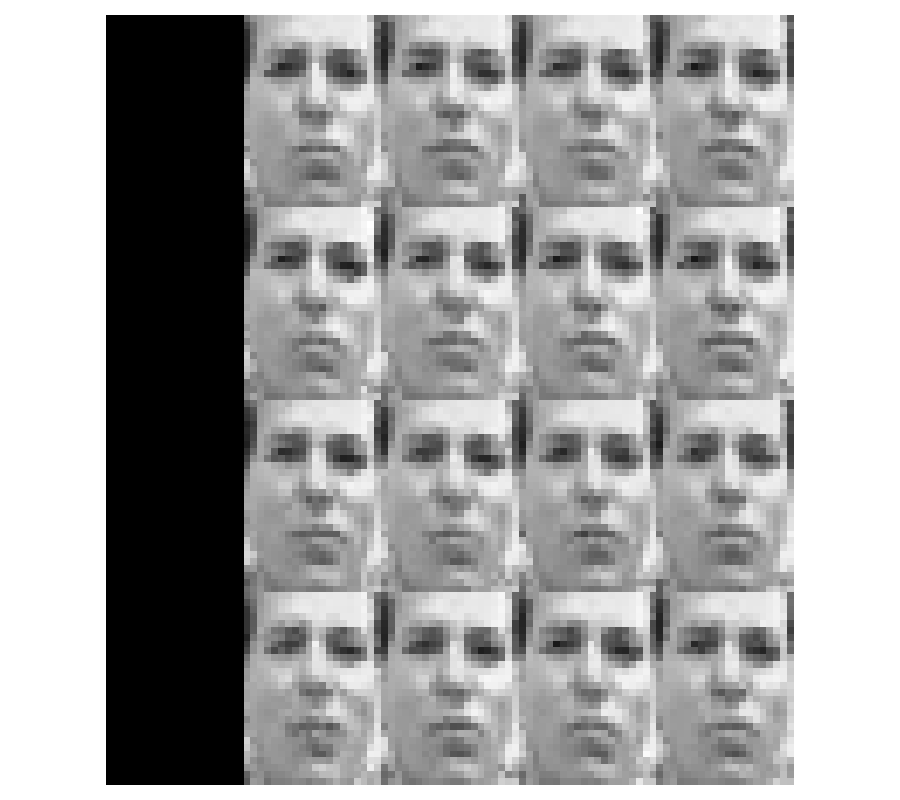

In [50]:
incomp = data['M'].sum(axis=-1) != data['M'].shape[-1]
idx = np.sort(np.random.choice(np.unique(data['orig_I'][incomp]), 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(data['orig_I'] == i)[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))